In [53]:
# Dependencies
import csv
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from datetime import datetime
from sqlalchemy import create_engine
import sqlite3
import seaborn as sns
%matplotlib inline

In [27]:
crime_df = pd.read_csv("\ChicagoCrime2001-Present2.csv")
climate_df= pd.read_csv("Historical_Chicago_Temp.csv")

In [28]:
crime_df
crime_df.drop(['date'],axis=1)
crime_df.drop(crime_df.iloc[:, 0:9], inplace = True, axis = 1)
crime_df

,arrest,beat,block,case_number,community_area,date,description,district,domestic,fbi_code,...,location_description,longitude,primary_type,updated_on,ward,x_coordinate,y_coordinate,year,Date,Time (CT)
0,False,114,0000X S COLUMBUS DR,JC329823,32,2019-07-01T10:00:00.000,TO VEHICLE,1,True,14,...,PARKING LOT/GARAGE(NON.RESID.),-87.620768,CRIMINAL DAMAGE,2019-07-08T16:16:04.000,42,1178293,1900315,2019,2019-07-01,10:00:00
1,False,1511,059XX W CHICAGO AVE,JC329789,25,2019-07-01T09:45:00.000,RETAIL THEFT,15,False,06,...,SMALL RETAIL STORE,-87.773958,THEFT,2019-07-08T16:16:04.000,29,1136546,1904726,2019,2019-07-01,09:45:00
2,False,331,022XX E 70TH PL,JC329733,43,2019-07-01T09:03:00.000,$500 AND UNDER,3,False,06,...,APARTMENT,-87.570939,THEFT,2019-07-08T16:16:04.000,5,1192233,1858650,2019,2019-07-01,09:03:00
3,False,732,073XX S EMERALD AVE,JC329691,68,2019-07-01T08:50:00.000,$500 AND UNDER,7,False,06,...,STREET,-87.643080,THEFT,2019-07-08T16:16:04.000,6,1172571,1856220,2019,2019-07-01,08:50:00
4,False,1915,040XX N BROADWAY,JC329702,3,2019-07-01T08:30:00.000,SIMPLE,19,False,08A,...,SIDEWALK,-87.650809,ASSAULT,2019-07-08T16:16:04.000,46,1169900,1926923,2019,2019-07-01,08:30:00
5,False,412,083XX S MERRILL AVE,JC329671,46,2019-07-01T08:00:00.000,DOMESTIC BATTERY SIMPLE,4,True,08B,...,RESIDENCE,-87.572192,BATTERY,2019-07-08T16:16:04.000,7,1191967,1850075,2019,2019-07-01,08:00:00
6,False,1124,033XX W JACKSON BLVD,JC329659,27,2019-07-01T07:55:00.000,AGGRAVATED: OTHER DANG WEAPON,11,False,04B,...,STREET,-87.710075,BATTERY,2019-07-08T16:16:04.000,28,1153985,1898489,2019,2019-07-01,07:55:00
7,False,2422,017XX W JARVIS AVE,JC329646,1,2019-07-01T07:50:00.000,TO VEHICLE,24,False,14,...,RESIDENTIAL YARD (FRONT/BACK),-87.673238,CRIMINAL DAMAGE,2019-07-08T16:16:04.000,49,1163628,1949089,2019,2019-07-01,07:50:00
8,False,2423,016XX W SHERWIN AVE,JC329648,1,2019-07-01T07:50:00.000,OVER $500,24,False,06,...,"VEHICLE - OTHER RIDE SHARE SERVICE (E.G., UBER...",-87.671018,THEFT,2019-07-08T16:16:04.000,49,1164234,1948721,2019,2019-07-01,07:50:00
9,False,1523,002XX N PINE AVE,JC329656,25,2019-07-01T07:45:00.000,TO CITY OF CHICAGO PROPERTY,15,False,14,...,"SCHOOL, PUBLIC, BUILDING",-87.763346,CRIMINAL DAMAGE,2019-07-08T16:16:04.000,37,1139459,1901147,2019,2019-07-01,07:45:00


In [40]:
crime_df.rename(columns={'Date': 'Crime_date'},inplace=True)
crime_df.rename(columns={'Time (CT)': 'Crime_time (CT)'},inplace=True)
crime_df

,arrest,beat,block,case_number,community_area,date,description,district,domestic,fbi_code,...,location_description,longitude,primary_type,updated_on,ward,x_coordinate,y_coordinate,year,Crime_date,Crime_time (CT)
0,False,114,0000X S COLUMBUS DR,JC329823,32,2019-07-01T10:00:00.000,TO VEHICLE,1,True,14,...,PARKING LOT/GARAGE(NON.RESID.),-87.620768,CRIMINAL DAMAGE,2019-07-08T16:16:04.000,42,1178293,1900315,2019,2019-07-01,10:00:00
1,False,1511,059XX W CHICAGO AVE,JC329789,25,2019-07-01T09:45:00.000,RETAIL THEFT,15,False,06,...,SMALL RETAIL STORE,-87.773958,THEFT,2019-07-08T16:16:04.000,29,1136546,1904726,2019,2019-07-01,09:45:00
2,False,331,022XX E 70TH PL,JC329733,43,2019-07-01T09:03:00.000,$500 AND UNDER,3,False,06,...,APARTMENT,-87.570939,THEFT,2019-07-08T16:16:04.000,5,1192233,1858650,2019,2019-07-01,09:03:00
3,False,732,073XX S EMERALD AVE,JC329691,68,2019-07-01T08:50:00.000,$500 AND UNDER,7,False,06,...,STREET,-87.643080,THEFT,2019-07-08T16:16:04.000,6,1172571,1856220,2019,2019-07-01,08:50:00
4,False,1915,040XX N BROADWAY,JC329702,3,2019-07-01T08:30:00.000,SIMPLE,19,False,08A,...,SIDEWALK,-87.650809,ASSAULT,2019-07-08T16:16:04.000,46,1169900,1926923,2019,2019-07-01,08:30:00
5,False,412,083XX S MERRILL AVE,JC329671,46,2019-07-01T08:00:00.000,DOMESTIC BATTERY SIMPLE,4,True,08B,...,RESIDENCE,-87.572192,BATTERY,2019-07-08T16:16:04.000,7,1191967,1850075,2019,2019-07-01,08:00:00
6,False,1124,033XX W JACKSON BLVD,JC329659,27,2019-07-01T07:55:00.000,AGGRAVATED: OTHER DANG WEAPON,11,False,04B,...,STREET,-87.710075,BATTERY,2019-07-08T16:16:04.000,28,1153985,1898489,2019,2019-07-01,07:55:00
7,False,2422,017XX W JARVIS AVE,JC329646,1,2019-07-01T07:50:00.000,TO VEHICLE,24,False,14,...,RESIDENTIAL YARD (FRONT/BACK),-87.673238,CRIMINAL DAMAGE,2019-07-08T16:16:04.000,49,1163628,1949089,2019,2019-07-01,07:50:00
8,False,2423,016XX W SHERWIN AVE,JC329648,1,2019-07-01T07:50:00.000,OVER $500,24,False,06,...,"VEHICLE - OTHER RIDE SHARE SERVICE (E.G., UBER...",-87.671018,THEFT,2019-07-08T16:16:04.000,49,1164234,1948721,2019,2019-07-01,07:50:00
9,False,1523,002XX N PINE AVE,JC329656,25,2019-07-01T07:45:00.000,TO CITY OF CHICAGO PROPERTY,15,False,14,...,"SCHOOL, PUBLIC, BUILDING",-87.763346,CRIMINAL DAMAGE,2019-07-08T16:16:04.000,37,1139459,1901147,2019,2019-07-01,07:45:00


In [34]:
climate_df.rename(columns={'Date': 'Climate_date'},inplace=True)

climate_df['Climate_date'] = climate_df['Climate_date'].astype('datetime64[ns]')
climate_df

,Climate_date,Temp Max (° F),Temp Avg (° F),Temp Min (° F),Dew Max (° F),Dew Avg (° F),Dew Min (° F),Humidity Max (%),Humidity Avg (%),Humidity Min (%),Wind Max (mph),Wind Avg (mph),Wind Min (mph),Pressure Max (Hg),Pressure Avg (Hg),Pressue Min (Hg),Precipation Max (in),Precipation Avg (in),Precipation Min (in)
0,2010-01-01,16,11,5,0,0,0,83,-,61,15,-,0,0.00,-,0.00,-,0.00,-
1,2010-01-02,11,7,2,0,0,0,80,-,52,18,-,0,0.00,-,0.00,-,0.00,-
2,2010-01-03,18,9,-1,0,0,0,79,-,61,16,-,0,0.00,-,0.00,-,0.00,-
3,2010-01-04,18,13,7,0,0,0,80,-,67,17,-,0,0.00,-,0.00,-,0.00,-
4,2010-01-05,23,18,13,0,0,0,80,-,65,16,-,0,0.00,-,0.00,-,0.00,-
5,2010-01-06,20,15,10,0,0,0,84,-,67,12,-,0,0.00,-,0.00,-,0.01,-
6,2010-01-07,22,19,16,0,0,0,92,-,80,13,-,0,0.00,-,0.00,-,0.27,-
7,2010-01-08,27,19,11,0,0,0,92,-,67,23,-,0,0.00,-,0.00,-,0.27,-
8,2010-01-09,22,14,6,0,0,0,80,-,61,15,-,0,0.00,-,0.00,-,0.00,-
9,2010-01-10,18,9,0,0,0,0,87,-,61,24,-,0,0.00,-,0.00,-,0.00,-


In [41]:
big_df = pd.concat([climate_df, crime_df], axis=1, join_axes=[crime_df.index])
big_df

,Climate_date,Temp Max (° F),Temp Avg (° F),Temp Min (° F),Dew Max (° F),Dew Avg (° F),Dew Min (° F),Humidity Max (%),Humidity Avg (%),Humidity Min (%),...,location_description,longitude,primary_type,updated_on,ward,x_coordinate,y_coordinate,year,Crime_date,Crime_time (CT)
0,2010-01-01,16.0,11.0,5.0,0.0,0.0,0.0,83.0,-,61.0,...,PARKING LOT/GARAGE(NON.RESID.),-87.620768,CRIMINAL DAMAGE,2019-07-08T16:16:04.000,42,1178293,1900315,2019,2019-07-01,10:00:00
1,2010-01-02,11.0,7.0,2.0,0.0,0.0,0.0,80.0,-,52.0,...,SMALL RETAIL STORE,-87.773958,THEFT,2019-07-08T16:16:04.000,29,1136546,1904726,2019,2019-07-01,09:45:00
2,2010-01-03,18.0,9.0,-1.0,0.0,0.0,0.0,79.0,-,61.0,...,APARTMENT,-87.570939,THEFT,2019-07-08T16:16:04.000,5,1192233,1858650,2019,2019-07-01,09:03:00
3,2010-01-04,18.0,13.0,7.0,0.0,0.0,0.0,80.0,-,67.0,...,STREET,-87.643080,THEFT,2019-07-08T16:16:04.000,6,1172571,1856220,2019,2019-07-01,08:50:00
4,2010-01-05,23.0,18.0,13.0,0.0,0.0,0.0,80.0,-,65.0,...,SIDEWALK,-87.650809,ASSAULT,2019-07-08T16:16:04.000,46,1169900,1926923,2019,2019-07-01,08:30:00
5,2010-01-06,20.0,15.0,10.0,0.0,0.0,0.0,84.0,-,67.0,...,RESIDENCE,-87.572192,BATTERY,2019-07-08T16:16:04.000,7,1191967,1850075,2019,2019-07-01,08:00:00
6,2010-01-07,22.0,19.0,16.0,0.0,0.0,0.0,92.0,-,80.0,...,STREET,-87.710075,BATTERY,2019-07-08T16:16:04.000,28,1153985,1898489,2019,2019-07-01,07:55:00
7,2010-01-08,27.0,19.0,11.0,0.0,0.0,0.0,92.0,-,67.0,...,RESIDENTIAL YARD (FRONT/BACK),-87.673238,CRIMINAL DAMAGE,2019-07-08T16:16:04.000,49,1163628,1949089,2019,2019-07-01,07:50:00
8,2010-01-09,22.0,14.0,6.0,0.0,0.0,0.0,80.0,-,61.0,...,"VEHICLE - OTHER RIDE SHARE SERVICE (E.G., UBER...",-87.671018,THEFT,2019-07-08T16:16:04.000,49,1164234,1948721,2019,2019-07-01,07:50:00
9,2010-01-10,18.0,9.0,0.0,0.0,0.0,0.0,87.0,-,61.0,...,"SCHOOL, PUBLIC, BUILDING",-87.763346,CRIMINAL DAMAGE,2019-07-08T16:16:04.000,37,1139459,1901147,2019,2019-07-01,07:45:00


In [45]:
database_path = "/Project_3_FINAL/Project_3"
engine = create_engine(f"sqlite:///{database_path}")

In [46]:
big_df.to_csv(r'\Joined_Climate_Crime_Data.csv')

In [52]:
con = sqlite3.connect("Project_3_FINAL/Project_3.sqlite")
big_df.to_sql("Joined_Climate_Crime_Data", conn, if_exists="replace")

OperationalError: unable to open database file

TypeError: unsupported operand type(s) for /: 'str' and 'int'

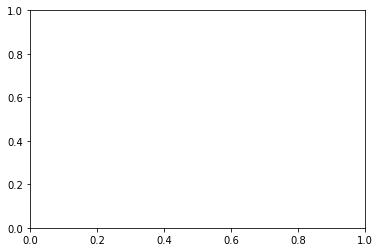

In [55]:
sns.distplot(big_df['primary_type'])